# Decission Tree

In [1]:
path = "https://raw.githubusercontent.com/Kamil128/Learning_repo/main/ML_Classification/data/titanic_train.csv"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(col_to_drop, axis=1, inplace=True)

In [5]:
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int', errors='ignore')
df['Embarked'] = df['Embarked'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [6]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

age = kbins.fit_transform(X_train[['Age']].fillna(28))
age

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],

In [10]:
kbins.bin_edges_

array([array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])], dtype=object)

In [11]:
pd.DataFrame({'kbins': age.flatten(), 'age': X_train['Age'].fillna(28).values})

,kbins,age
0,1.0,28.0
1,1.0,28.0
2,1.0,28.0
3,0.0,18.0
4,1.0,31.0
...,...,...
707,1.0,28.0
708,1.0,35.0
709,2.0,48.0
710,2.0,47.0


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer


num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     # ('standard_scaller', StandardScaler()),
     ('discr', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'))
    ]
)

cat_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False)),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', cat_pipeline, cat_attr)
    ]
)

In [13]:
cat_num_pipeline.fit_transform(X_train)

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [46]:
from sklearn.tree import DecisionTreeClassifier

train_pipeline = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', DecisionTreeClassifier(max_depth=2))
    ]
)

In [47]:
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('discr',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_bins=3,
                                                                                    strategy='uniform'))]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=2))])

In [48]:
y_pred = train_pipeline.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       110
           1       0.94      0.45      0.61        69

    accuracy                           0.78       179
   macro avg       0.84      0.72      0.73       179
weighted avg       0.82      0.78      0.75       179



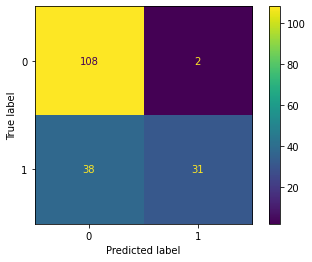

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

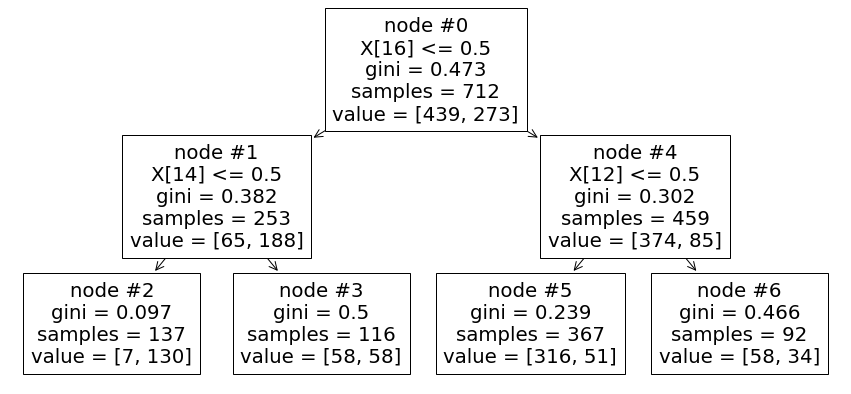

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7))
plot_tree(train_pipeline['model'], node_ids=True)
plt.show()

In [56]:
train_pipeline['model'].apply(
train_pipeline['cat_num_pipeline'].transform(X_test)
)

array([5, 5, 5, 5, 3, 3, 2, 6, 6, 5, 5, 5, 3, 5, 6, 5, 3, 5, 5, 2, 5, 2,
       5, 3, 5, 2, 5, 6, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 2, 6, 2, 5, 2,
       2, 5, 5, 3, 3, 2, 2, 3, 3, 5, 6, 5, 5, 6, 3, 6, 3, 2, 5, 5, 6, 3,
       2, 5, 6, 5, 2, 5, 3, 2, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 3, 6, 5, 3,
       6, 2, 6, 6, 5, 5, 6, 2, 2, 5, 5, 5, 6, 2, 3, 2, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 2, 5, 5, 5, 5, 6, 5, 2, 5, 3, 5, 5, 6, 3, 5, 6, 5, 5,
       3, 5, 5, 5, 2, 5, 3, 5, 6, 5, 6, 6, 5, 6, 5, 5, 2, 2, 5, 5, 2, 3,
       6, 3, 5, 5, 5, 2, 6, 2, 3, 2, 2, 3, 5, 6, 2, 3, 5, 5, 6, 5, 2, 5,
       5, 2, 5])

In [52]:
decision_pat = train_pipeline['model'].decision_path(
train_pipeline['cat_num_pipeline'].transform(X_test)
).toarray()

In [68]:
decision_pat[0]

array([1, 0, 0, 0, 1, 1, 0])

In [54]:
pd.DataFrame(train_pipeline['cat_num_pipeline'].transform(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
175,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
177,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 16] <= 0.5 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 14] <= 0.5 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 12] <= 0.5 else to node 6.
		node=5 is a leaf node.
		node=6 is a leaf node.


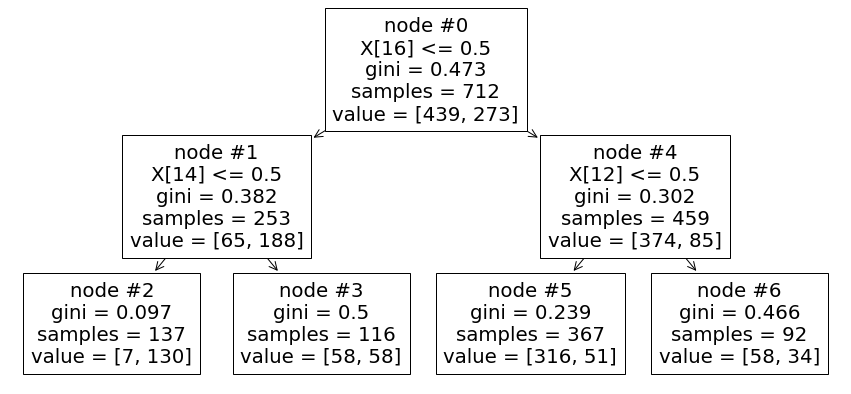

In [74]:
import numpy as np
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = train_pipeline['model']

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

##############################################################################
# We can compare the above output to the plot of the decision tree.

plt.figure(figsize=(15, 7))
tree.plot_tree(clf, node_ids=True)
plt.show()

In [75]:
X_test = train_pipeline['cat_num_pipeline'].transform(X_test)

node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

##############################################################################
# For a group of samples, we can determine the common nodes the samples go
# through.

sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))

Rules used to predict sample 0:

decision node 0 : (X_test[0, 16] = 1.0) > 0.5)
decision node 4 : (X_test[0, 12] = 0.0) <= 0.5)

The following samples [0, 1] share the node(s) [0 4 5] in the tree.
This is 42.857142857142854% of all nodes.
